# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

First, inspect the data:

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
len(df), len(df[df.gender=='M']), len(df[df.gender=='F'])

(130, 65, 65)

The are three variables: temperature, gender, and heart rate. There are 65 data points for each gender.

In [4]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

### 1. Is the distribution of body temperatures normal? 

First, we examine the normality of body temperatures graphically with a histogram:  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

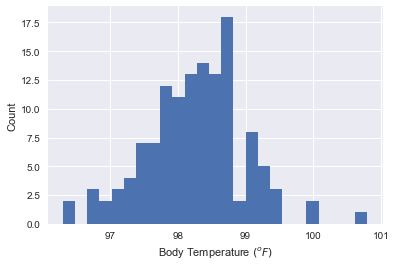

In [6]:
plt.hist(df.temperature, bins=25)
plt.xlabel(r'Body Temperature $(^oF)$'); plt.ylabel('Count')
plt.show()

The histogram shows that distribution of body temperature is somewhat symmetric. However, it is hard to tell whether it is normally distrbuted.

Next, we look at the cumulative distribution function (CDF) plot:

In [7]:
#import required package
from scipy.stats import norm 

In [8]:
#Create the ecdf function
def ecdf(data):
    x = np.sort(df.temperature)
    y = np.arange(1,len(x)+1)/len(x)
    return x, y

In [9]:
#Calculate probability densities based on normal distribution assumption
temp_min = min(df.temperature)
temp_max = max(df.temperature)
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
temp_sample = np.linspace(temp_min,temp_max,100)
temp_sample_cdf = norm.cdf(temp_sample,loc=temp_mean,scale=temp_std)

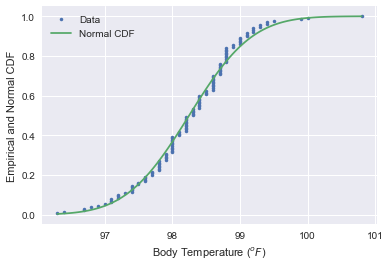

In [10]:
#Create ecdf for empirical data and normal distribution
x, y = ecdf(df.temperature)
plt.plot(x,y,marker='.',linestyle='none',label='Data')
plt.plot(temp_sample,temp_sample_cdf,label='Normal CDF')
plt.xlabel(r'Body Temperature ($^oF$)')
plt.ylabel('Empirical and Normal CDF')
plt.legend(loc='upper left')
plt.show()

The CDF graph shows that the data is normally distributed.  

Finally, we create a Q-Q plot to evaluate normality:

In [11]:
#import required package
import statsmodels.api as sm

C:\Users\georg\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


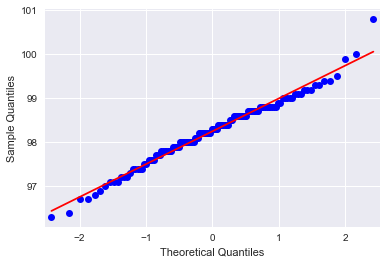

In [12]:
sm.qqplot(df.temperature,line='r')
plt.show()

The plot shows that the Q-Q plot is reasonably linear, suggesting normality of the data.

Next, we use the Shapiro-Wilk test, which is a test of normality in frequentist statistics.  
The null hypothesis is the data was drawn from a normal distribution.  
The test size ($\alpha$) of 0.05 is used.

In [13]:
#import required package
from scipy import stats

In [14]:
W, p = stats.shapiro(df.temperature)
print(f'The test statistic is {W:.3}, and the p-value is {p:.3}.')

The test statistic is 0.987, and the p-value is 0.233.


Since $p$ > $\alpha$, we can assume the data is obtained from a normal population.

### 2. Is the sample size large? Are the observations independent?

The sample size is 130, which is greater than 30. It should be sufficiently large for the CLT to hold.  
Since the body temperatures are obtained from different individuals, they are independent. 

### 3. Is the true population mean really 98.6 degrees F?


In [15]:
print(f'The sample average temperature is {temp_mean:.5} F.')

The sample average temperature is 98.249 F.


#### First, try a bootstrap hypothesis test.

The problem statement is whether the mean body temperature is really 98.6 $^oF$. Since the mean temperature is lower than 98.6 $^oF$, it would be reasonable to question whether the mean temperature is lower than the commonly accepted value.  

As such, we can use a one-sided test. The hypothesis test is:  
$H_o: \mu = 98.6$ vs. $H_a: \mu \le 98.6$ 

First, calculate the difference between the mean temperature and 98.6 $^oF$:

In [16]:
temp_diff = temp_mean - 98.6
temp_diff

-0.35076923076921673

Since the body temperature is about -0.3508 $^oF$ lower than 98.6 $^oF$, we need to shift the data set so that the mean temperature is 98.6 $^oF$:

In [17]:
temp_data_shifted = df.temperature - temp_mean + 98.6
#Confirm the mean of the shifted temperature data is 98.6
print(f'The mean of the shifted temperature data is: {temp_data_shifted.mean():.3} F.')

The mean of the shifted temperature data is: 98.6 F.


With that, we bootstrap the shifted temperature data 10000 times and calculate the difference from 98.6 $^oF$:

In [18]:
np.random.seed(100)
n_reps = 10000
temp_diff_list = np.empty(n_reps)
for i in range(n_reps):
    temp_diff_list[i] = np.mean(np.random.choice(temp_data_shifted, 
                                                 size=len(temp_data_shifted))) - 98.6


The p-value is the proportion of mean temperature difference that is at least or more extreme than the value calculated from the data (i.e. -0.3508).

In [19]:
p_value = (np.sum(temp_diff_list < temp_diff))/len(temp_diff_list)
print(p_value)

0.0


Based on this simulation, there is no mean temperature difference as extreme as that of the data set.  
Therefore, the null hypothesis is rejected. The mean body temperature is significantly lower than 98.6 $^oF$.

#### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

The one-sample test should be used because there is only one sample.

#### In this situation, is it appropriate to use the $t$ or $z$ statistic?

The main difference between the $t$ or $z$ statistics is that the variance is known for $z$ statistic but unknown for $t$ statistic.  
Since the sample size is sufficiently large, sample variance is a good variance both statistics should yield very similar results.

First, use the $z$ statistic:  
The test statistic is:
$Z=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$

In [20]:
n_data = len(df)
Z = (temp_mean - 98.6)/(temp_std/np.sqrt(n_data))
print(Z)

-5.45482329236


The critical value, $Z^*$ with $\alpha = 0.05$, is -1.645.  
Since $Z < Z^*$, the null hypothesis is rejected. There is significant evidence the mean body temperature is lower than 98.6 $^oF$.

Next, use the $t$ staistic:  
The test statistic is:
$T=\frac{\bar{x}-\mu}{s/\sqrt{n}}$  

In this case, it is the same as $Z$ which is -5.45.  
The critical value, $T^*$ with $\alpha = 0.05$ and $df = 129$, is -1.656.  
Since $T < T^*$, the null hypothesis is rejected.  There is significant evidence the mean body temperature is lower than 98.6 $^oF$. 

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [21]:
#Draw 10 samples randomly
np.random.seed(102)
data10 = np.random.choice(df.temperature,10,replace=False)
data10

array([ 97.7,  98.1,  98.4,  96.7,  99.1,  98. ,  98.7,  99.3,  98.6,  98.6])

#### Which one is the correct one to use? 

With this sample size, the sample variance is unlikely to be close to the population variance.  
The $t$ statistics should be used.

The test statistic, $T$, is:

In [22]:
(np.mean(data10)-98.6)/(np.std(data10)/np.sqrt(len(data10)))

-1.2477143519454674

The critial value, $T^*$, with $\alpha = 0.05$ and $df=9$, is -1.833.  
Since $T > T^*$, we fail to reject the null hypothesis. There is not significant evidence the body temperature is lower than 98.6 $^oF$.

The same conclusion would be drawn with the $Z-test$ with $Z^*=-1.645$, but it is not valid since the sample size is too small to assume that the sample variance is equal to the population variance.

#### What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

While both tests would fail to reject the null hypothesis, the critial value is higher in magnitude for the $t$ statistic than the $z$ statistic.  
With small sample size, $t$ statistic should be used.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Here, we assume that a body temperature outside of the 95% interval of the data to be 'abnormal'.

#### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Based on this dataset, the 2.5th percentile and 97.5 percentile of body temperatures are:

In [23]:
temp_range_bootstrap = np.percentile(df.temperature,[2.5,97.5])
temp_range_bootstrap

array([ 96.7225,  99.4775])

In [24]:
print(f'As such, someone\'s temperature is considered "abnormal" if it is outside of {temp_range_bootstrap[0]:.4} and {temp_range_bootstrap[1]:.4} F.')

As such, someone's temperature is considered "abnormal" if it is outside of 96.72 and 99.48 F.


#### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

At $n = 1$, the 95% confidence interval is:

In [25]:
lower, upper = temp_mean -1.96 * temp_std, temp_mean + 1.96 * temp_std
lower,upper

(96.81219177947445, 99.68626975898711)

In [26]:
print(f'As such, someone\'s temperature is considered "abnormal" if it is outside of {lower:.4} and {upper:.4} F.')

As such, someone's temperature is considered "abnormal" if it is outside of 96.81 and 99.69 F.


### 6. Is there a significant difference between males and females in normal temperature?

First, calculate the difference between the difference in mean body temperature between females and males: 

In [27]:
gender_diff = np.mean(df.loc[df.gender=='F','temperature']) - np.mean(df.loc[df.gender=='M','temperature'])
print(f'On average, female\'s body temperature is {gender_diff:.3} F higher.')

On average, female's body temperature is 0.289 F higher.


Then, visualize the difference in body temperature between males and females:

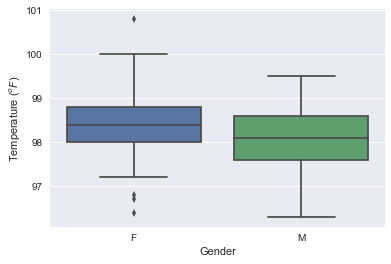

In [28]:
sns.boxplot(x='gender',y='temperature',data=df)
plt.xlabel('Gender')
plt.ylabel(r'Temperature ($^oF$)')
plt.show()

It can be seen that the females' body temperatures are generally higher than males'. It also has a higher variation with a few outliers. 

Based on the boxplot, it would be reasonable to test whether females' mean body temperature is higher than that of males'.  
  
The hypothesis test is:
$H_o: \mu_F = \mu_M$ vs. $H_a: \mu_F > \mu_M$  
  
The permutation approach instead of bootstraping is used because we are doing hypothesis testing.  Also, the permutation approach does not make any assumption on the distributions of male and female temperatures.

In [29]:
np.random.seed(101)
len_female = sum(df.gender == 'F')
n_reps = 10000
gender_diff_perm = np.empty(n_reps)
for i in range(n_reps):
    perm_sample = np.random.permutation(df.temperature)
    gender_diff_perm[i] = np.mean(perm_sample[:len_female]) - np.mean(perm_sample[len_female:])

In [30]:
p_value = sum(gender_diff_perm > gender_diff)/len(gender_diff_perm)
print(f'The p-value is: {p_value}')

The p-value is: 0.0113


Based on this simulation, since $p-value < 0.05$, we reject the null hypothesis. There is significant evidence the mean body temperature of female is higher than that of male.

### 6. Write a story with your conclusion in the context of the original problem.

In this exercise, we determine that the body temperature is normally distributed. 

We show that the mean body temperature is significantly lower than the commonly accepted value of $98.6 ^oF$. 

We also show that the mean body temperature of females is significantly higher than that of males. 